In [ ]:
#0.014580619644240834 mean vote intention lift
#0.0079164135970126951 std vote intention lift

In [ ]:
rbinom()

In [40]:
imp_tests <- c(#seq(2,10, 2),
    seq(10,200,10), seq(200, 20000, 1000))
mean_lift <- 0.014580619644240834
std_lift <- 0.0079164135970126951
ctr_p <- 0.2

sim_range <- data.frame()
#all_simulations <- data.frame()
for (i in imp_tests) {
    test_sims <- rbinom(100000, i / 2, ctr_p + mean_lift)
    ctrl_sims <- rbinom(100000, i / 2, ctr_p)
    lifts <- (test_sims - ctrl_sims) / (i / 2)
    res <- data.frame(imp = i, std_rate = sd(lifts), mean_rate = mean(lifts), 
                      std_score = sd(pnorm(((lifts) - mean_lift) / std_lift) * 100),
                      mean_score = mean(pnorm(((lifts) - mean_lift) / std_lift) * 100)
                     )
    sim_range <- rbind(sim_range, res)
    }

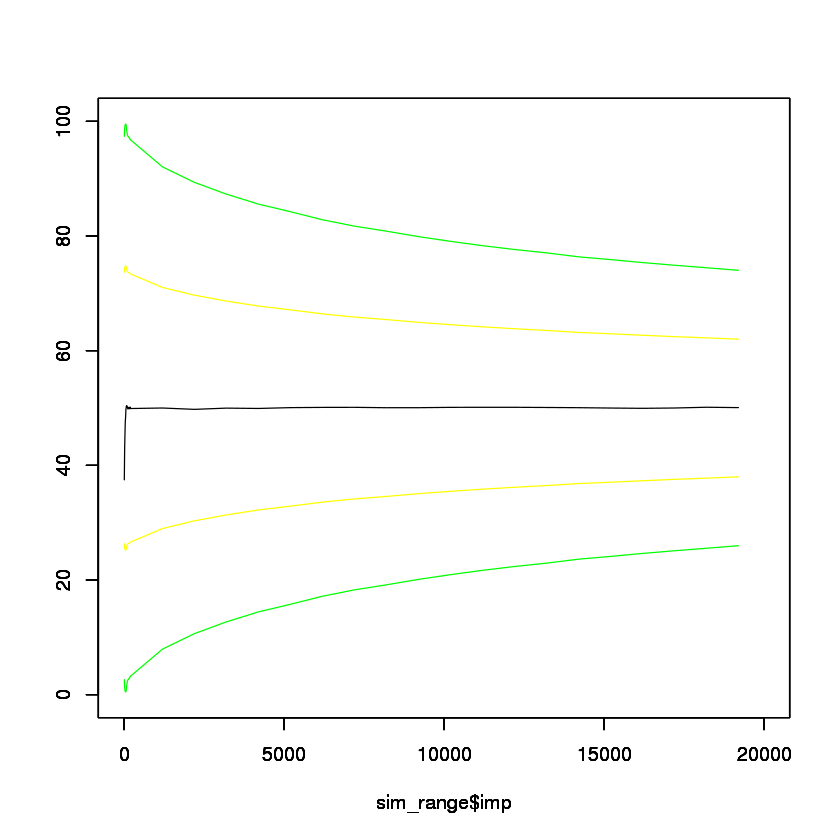

In [41]:
plot(sim_range$imp, 50 + sim_range$std_score , xlim = c(0, 20000), ylim = c(0, 100), col = 'green', type = 'l', ylab = "")
par(new = T)
plot(sim_range$imp, 50 - sim_range$std_score , xlim = c(0, 20000), ylim = c(0, 100), col = 'green', type = 'l', ylab = "")
par(new = T)
plot(sim_range$imp, sim_range$mean_score , xlim = c(0, 20000), ylim = c(0, 100), col = 'black', type = 'l', ylab = "")
par(new = T)
plot(sim_range$imp, 50 + sim_range$std_score / 2 , xlim = c(0, 20000), ylim = c(0, 100), col = 'yellow', type = 'l', ylab = "")
par(new = T)
plot(sim_range$imp, 50 - sim_range$std_score / 2 , xlim = c(0, 20000), ylim = c(0, 100), col = 'yellow', type = 'l', ylab = "")

In [42]:
per_model <- lm(formula = std_score ~ I(log(imp)) + I(imp ^ 0.2), data = sim_range, weight = log(imp))

In [43]:
summary(per_model)


Call:
lm(formula = std_score ~ I(log(imp)) + I(imp^0.2), data = sim_range, 
    weights = log(imp))

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.2104 -0.4924 -0.3110  0.5529  1.8790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  55.3958     0.3230  171.51   <2e-16 ***
I(log(imp))   3.1983     0.1736   18.43   <2e-16 ***
I(imp^0.2)   -8.7883     0.2077  -42.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8203 on 37 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 1.757e+04 on 2 and 37 DF,  p-value: < 2.2e-16


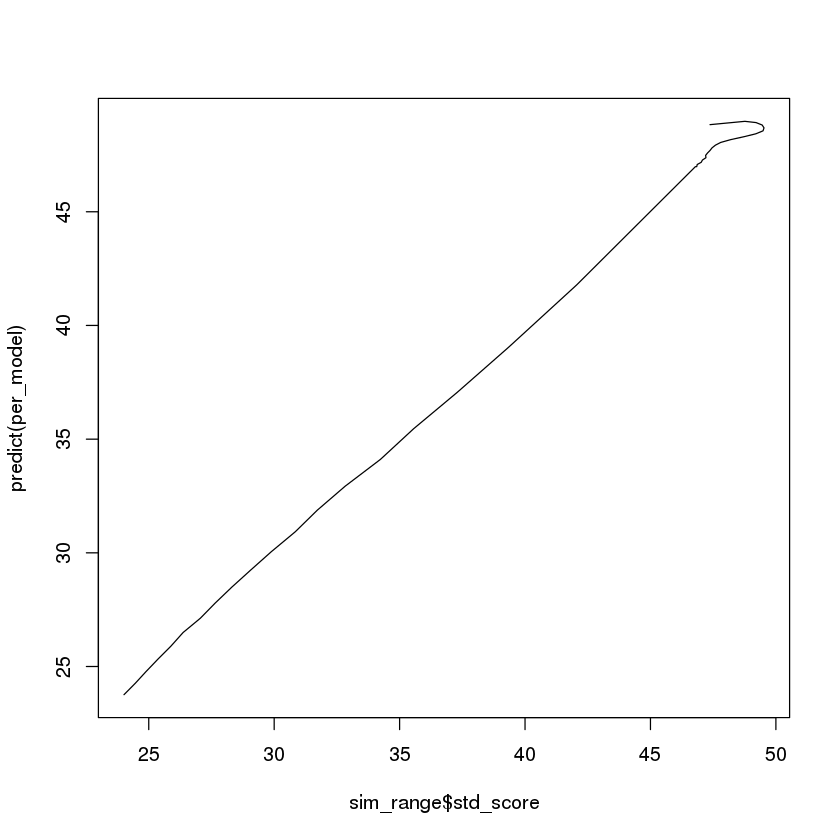

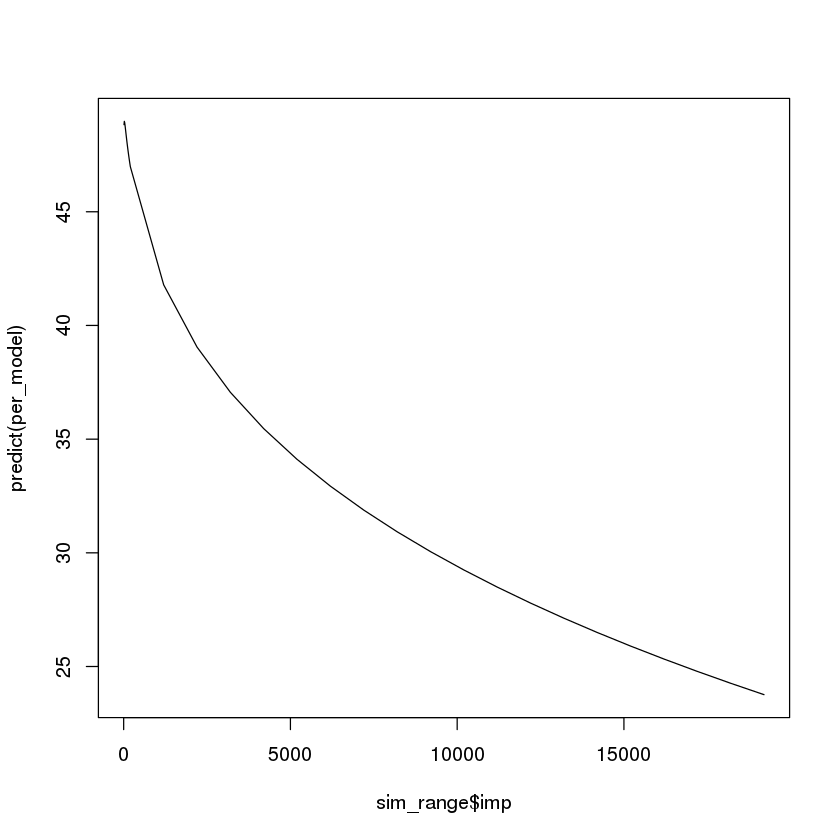

In [44]:
plot(sim_range$std_score, predict(per_model), type = 'l')
plot(sim_range$imp, predict(per_model), type = 'l')